In [14]:
import pandas as pd 
import numpy as np 
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Organize

In [3]:
#love
df_love = pd.read_csv('/home/lettuce/MyCode/Where is the love/Where-is-the-love/csv/final/rap_LOVE_2.csv')
df_love = df_love.drop(df_love.columns[[0, 1]], axis=1)
df_love.head()
#norm
df = pd.read_csv("/home/lettuce/MyCode/Where is the love/Where-is-the-love/csv/final/rap_FINAL_2.csv")
df = df.drop(df.columns[[0, 1]], axis=1)
df.head()
df_era = pd.read_csv("/home/lettuce/MyCode/Where is the love/Where-is-the-love/csv/rap_ERA.csv")

In [4]:
nlp = spacy.load('en_core_web_sm')
def is_verb_noun_adj(word):
    # Process the word
    doc = nlp(word)

    # Check the part of speech tag of the first token (should be the only one)
    pos = doc[0].pos_

    # Return True if it's a verb, noun or adjective, otherwise False
    return pos in ['VERB', 'NOUN', 'ADJ']

In [5]:
df_love = df_love.loc[:, df_love.columns.map(is_verb_noun_adj)]
df = df.loc[:, df.columns.map(is_verb_noun_adj)]

In [6]:
#Take Out total for new df
df_love_NT = df_love.drop(df_love.index[0]).reset_index(drop=True)
df_NT = df.drop(df.index[0]).reset_index(drop=True)

df_love_NT

,Artist Name,love,dont,know,do,got,song,make,track,get,...,try,easy,takes,banger,freddie,gibbs,turned,experiences,references,release
0,The Notorious B.I.G.,47.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Tupac,71.0,7.0,8.0,23.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Eminem,45.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Kendrick Lamar,85.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Nas,90.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Roxanne Shante,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,De La Soul,42.0,4.0,7.0,1.0,2.0,1.0,1.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,Run-DMC,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,Pop Smoke,26.0,6.0,6.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_love_NT["Era"] = df_era["Era"]
df_NT["Era"] = df_era["Era"]
df_love_NT

,Artist Name,love,dont,know,do,got,song,make,track,get,...,takes,banger,freddie,gibbs,turned,experiences,references,release,Era,love_total
0,The Notorious B.I.G.,47.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990s,48.0
1,Tupac,71.0,7.0,8.0,23.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990s,73.0
2,Eminem,45.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000s,51.0
3,Kendrick Lamar,85.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010s,110.0
4,Nas,90.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990s,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Roxanne Shante,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980s,10.0
126,De La Soul,42.0,4.0,7.0,1.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980s,45.0
127,Run-DMC,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980s,27.0
128,Pop Smoke,26.0,6.0,6.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020s,26.0


## Graphs


#### Use of the word love over eras

In [8]:
df_love_NT['love_total'] = df_love_NT[['love', 'loved', 'loves', 'loving']].sum(axis=1)
df_grouped = df_love_NT.groupby('Era')[['love_total']].sum()
df_grouped = df_grouped.reset_index()

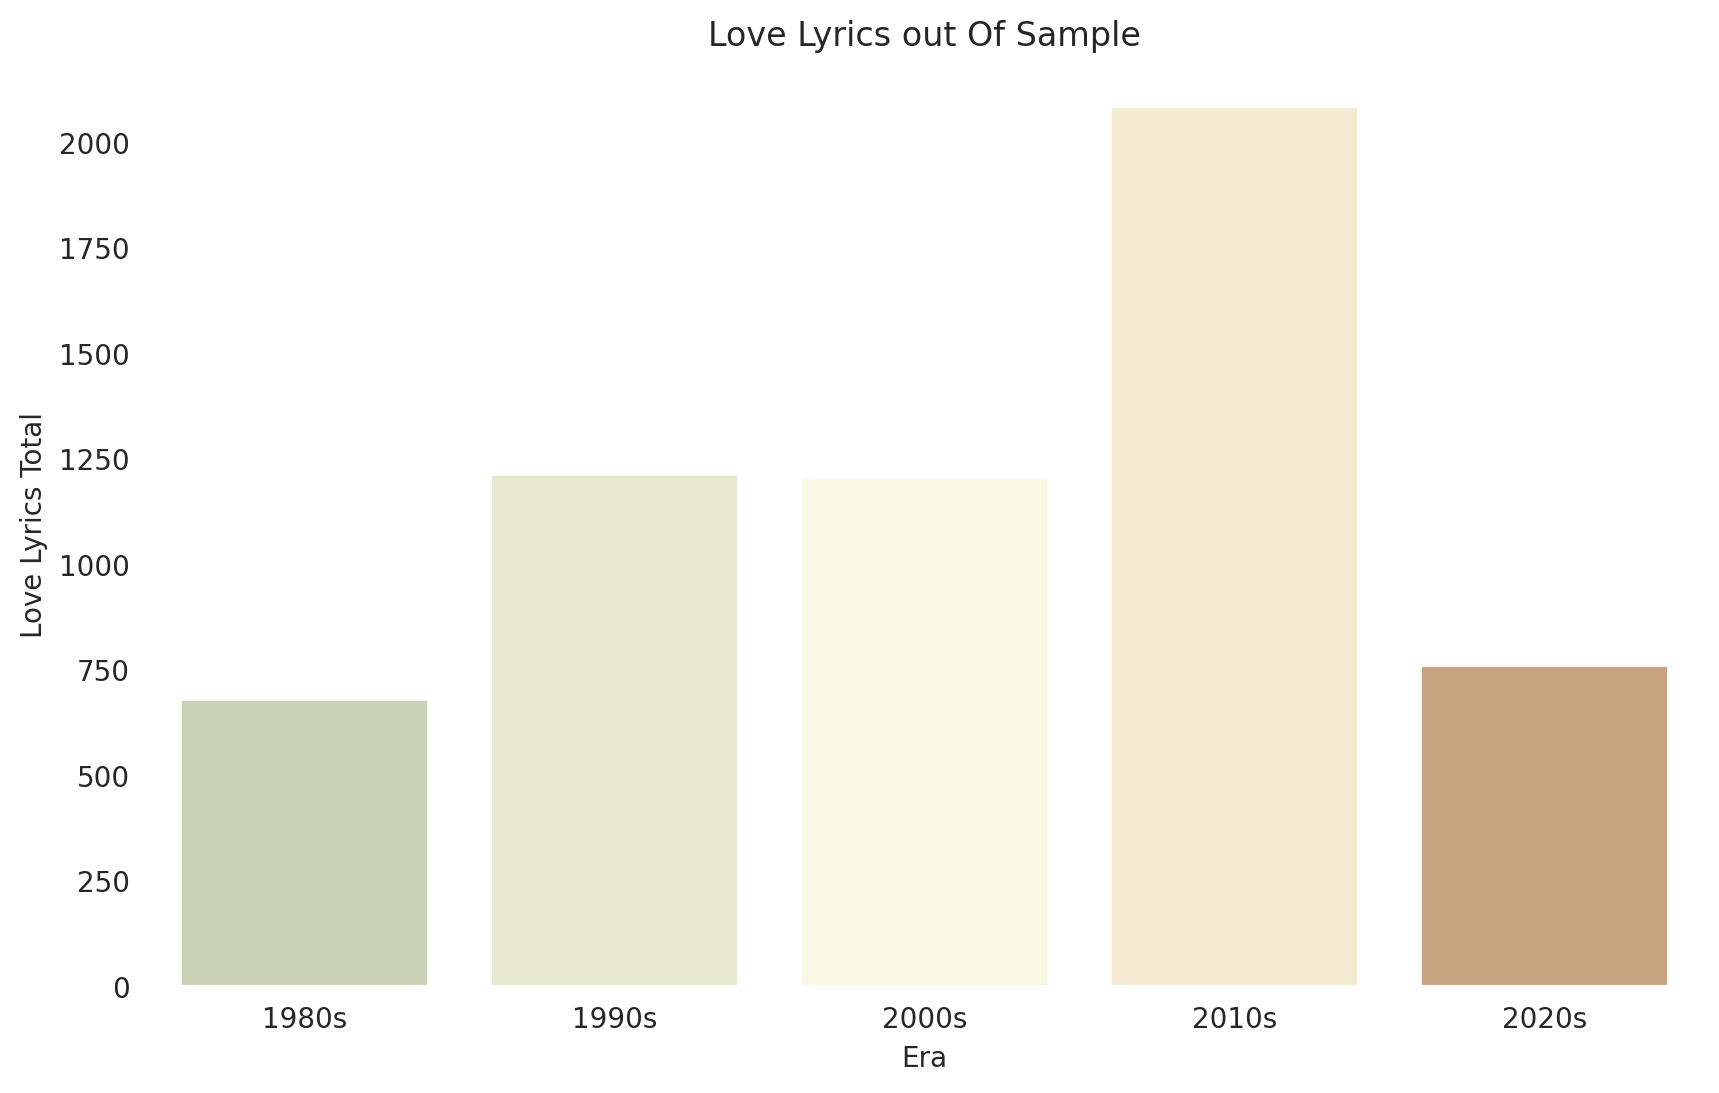

In [9]:
plt.figure(figsize=(10, 6), dpi=200)
colors = ['#ccd5ae', '#e9edc9', '#fefae0', '#faedcd', '#d4a373']
sns.set_style("darkgrid", {"axes.facecolor": "#FFFFFF"}) # replace with your hex code
sns.barplot(data=df_grouped,x='Era',y='love_total',errorbar=None,palette=colors)
plt.xlabel('Era')
plt.ylabel('Love Lyrics Total')
plt.title('Love Lyrics out Of Sample')

plt.show()

### Love per Artist

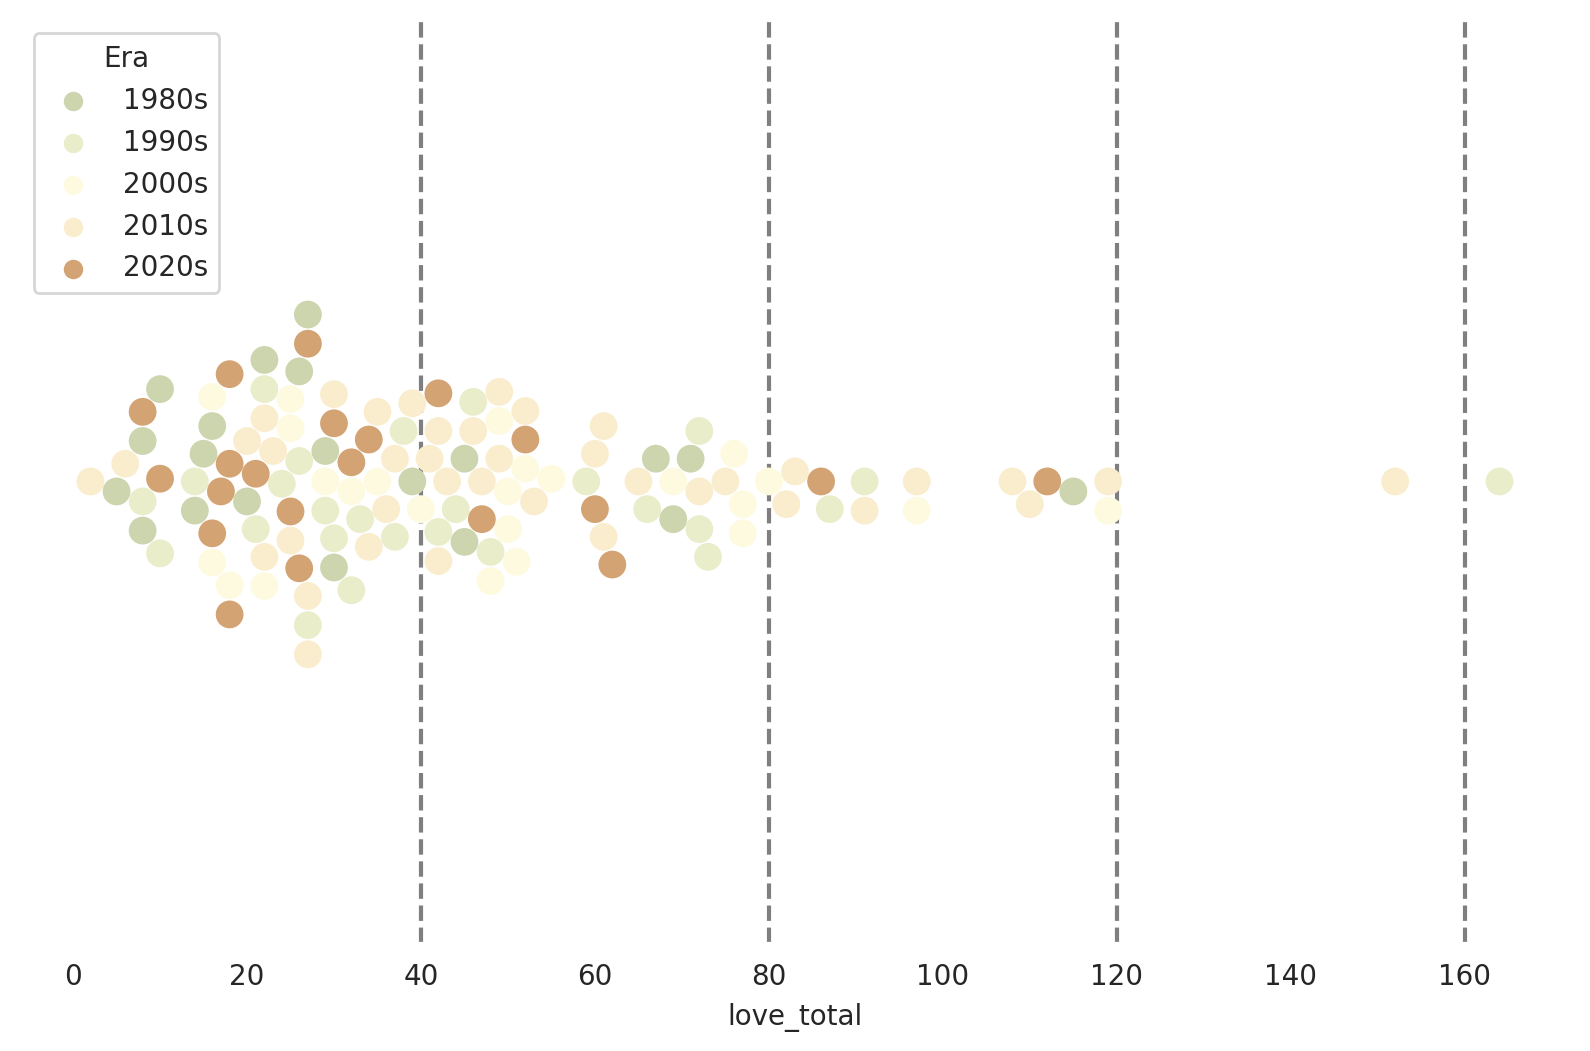

In [10]:
plt.figure(figsize=(10, 6), dpi=200)

# Create the swarm plot
sns.swarmplot(data=df_love_NT, x='love_total', hue='Era', hue_order=['1980s', '1990s', '2000s', '2010s', '2020s'], palette=colors, size=10)

# Add vertical lines with black color and slight opacity
plt.axvline(x=40, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=80, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=120, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=160, color='black', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Love Count by Era

### Love Count highest Artist and Genre

### Love Count on What they Loved 

In [ ]:
#Word Bubble

### Swears Count by Era

In [ ]:
df_summed = df_no_total[['Era', 'fuck','shit','bitch','motherfucker','hoes']].groupby('Era').sum()
df_melted = df_summed.reset_index().melt(id_vars='Era', var_name='word', value_name='count')

<Axes: xlabel='Era', ylabel='count'>

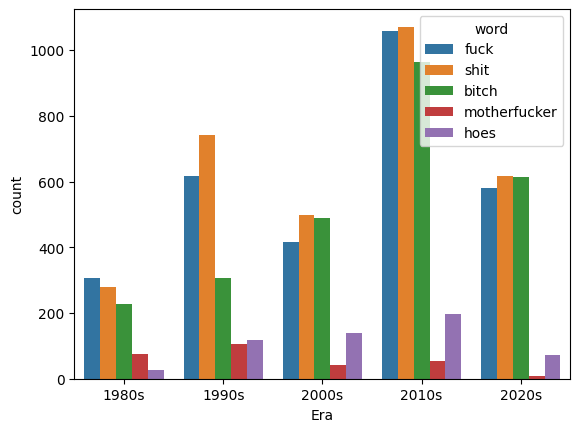

In [ ]:
#Swears over Era
#Histogram 
#This could work better with % of songs that have a swear 

#Need a way to grab like top 


sns.barplot(data=df_melted, x='Era', y='count', hue='word')

### Does more swears = less love